# Using sci-kit learn for decision trees

In [224]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [225]:
# dataset= '../../datasets/car_evaluation.decision-trees.csv'
# d = ['buying price', 'maintenance cost', 'nr of doors', 'nr of persons', 'lug boot', 'safety']
# t = 'decision'

dataset= '../../datasets/drugs.decision-trees.csv'
d = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
t = 'Drug'

In [226]:
df = pd.read_csv(dataset, sep=',', names=d+[t], header=0)

target_levels = df[t].unique()
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [227]:
# Only for car dataset
df = df.drop(d.pop(),axis=1) # "remove Na_to_K column from features"
df = df.drop(d.pop(0),axis=1) # "remove age from features"

# Label encode age
# bin_size = 10
# age_groups = [f"{x}-{x+bin_size-1}" for x in range(10,80,bin_size)]
# df['Age'] = pd.cut(df['Age'], bins=range(10, 90, bin_size), right=False, labels=age_groups) # age range is between 15 and 74
df.head(5)

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [228]:
X = df.drop(t,axis=1)
y = df[t]

In [229]:
onehot_encoder = OneHotEncoder(sparse_output=False).fit(X)
df_encoded = onehot_encoder.transform(X)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2 ) # random_state=42

'200 records trained'

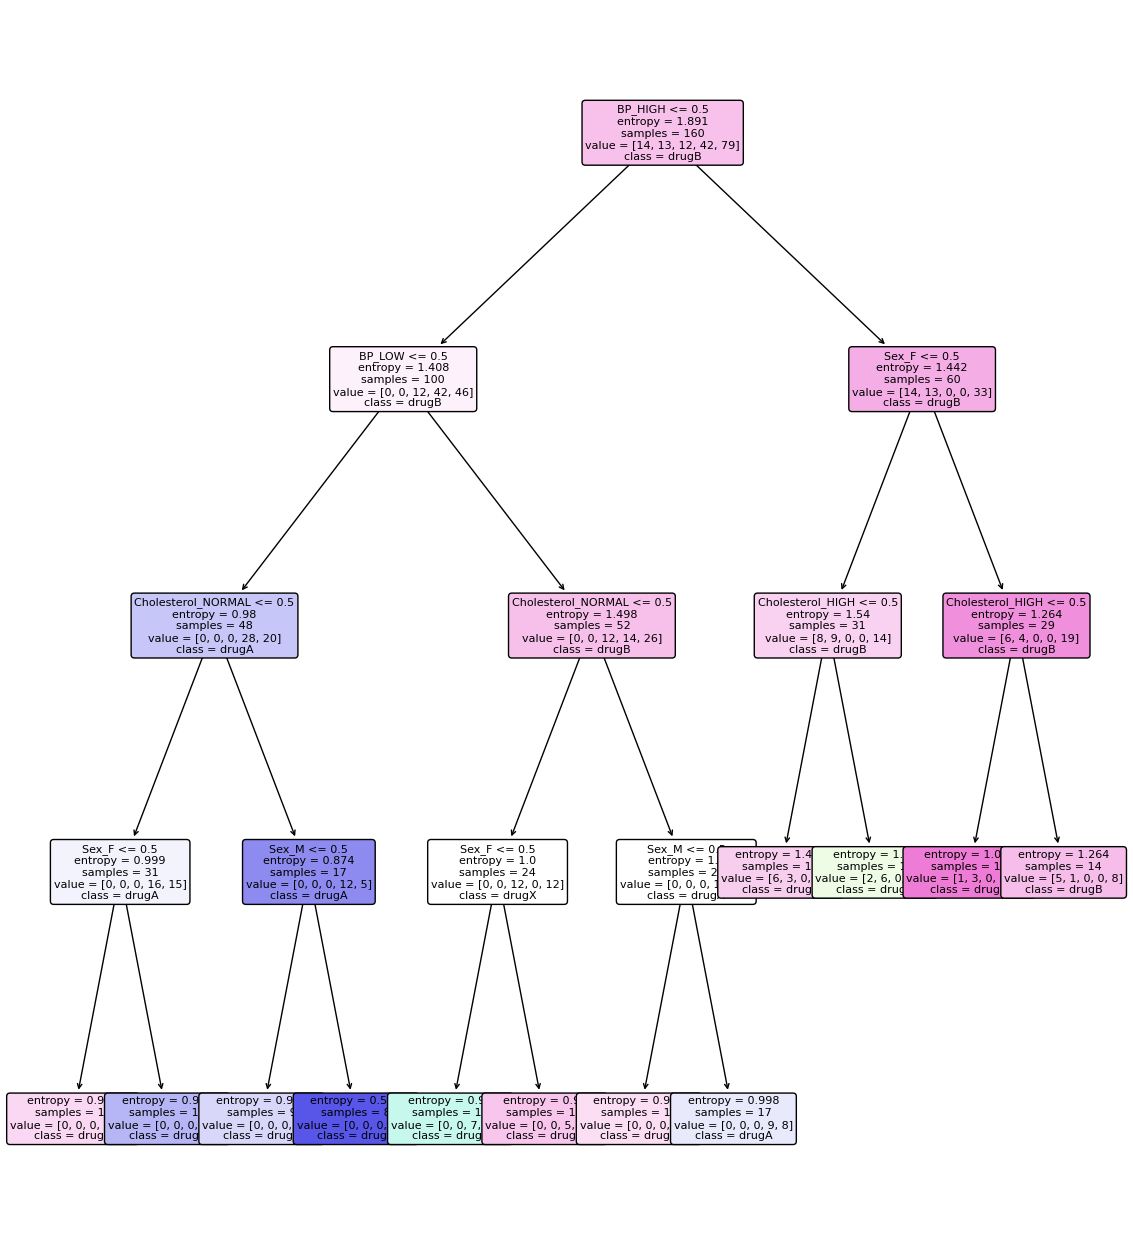

In [231]:
classifier = DecisionTreeClassifier(criterion='entropy')
drug_tree = classifier.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(14, 16))
tree.plot_tree(drug_tree, feature_names=onehot_encoder.get_feature_names_out(X.columns),
                      class_names=target_levels, fontsize = 8, 
                      filled=True, rounded=True)

f"{len(y)} records trained"

In [232]:
prediction = drug_tree.predict(X_test)
f"Accuracy: {accuracy_score(y_test, prediction)}" 

'Accuracy: 0.4'